In [9]:
#Data Understanding and Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


N-gram

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from CSV
dfNgram = pd.read_csv('balanced_subset.csv')

# Function to generate n-grams
def generate_ngrams(text, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.build_analyzer()(text)
    return ngrams

# Generate n-grams for each text in the dataframe for n = 1 to 6
for n in range(1, 7):
    dfNgram[f'{n}_grams'] = dfNgram['cleaned_text'].apply(lambda x: generate_ngrams(x, n))


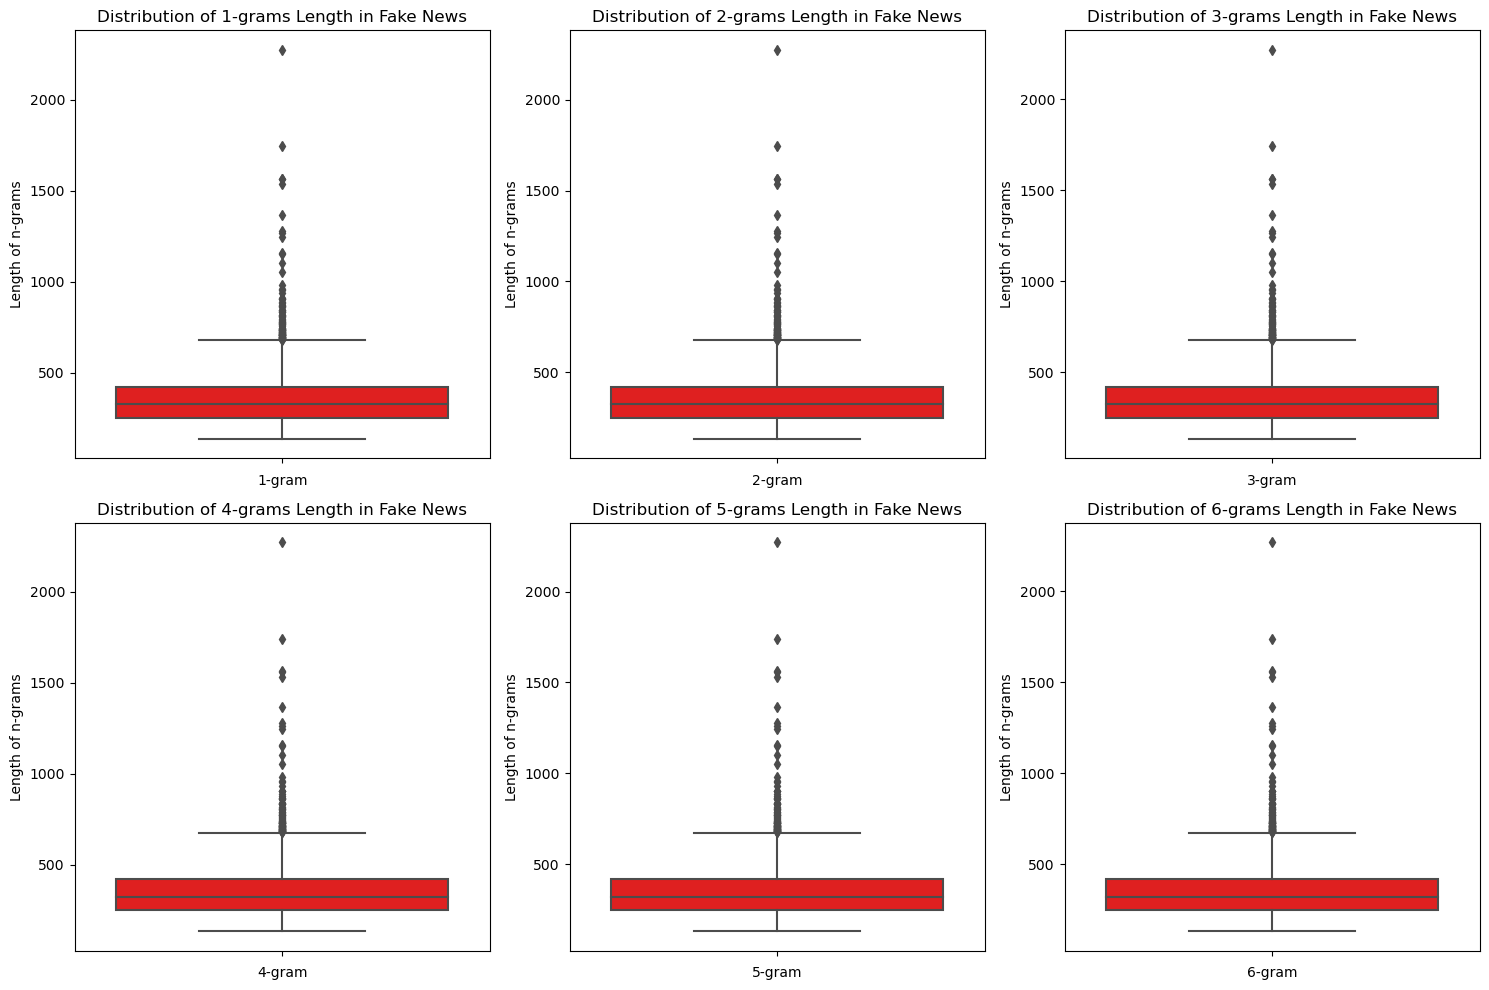

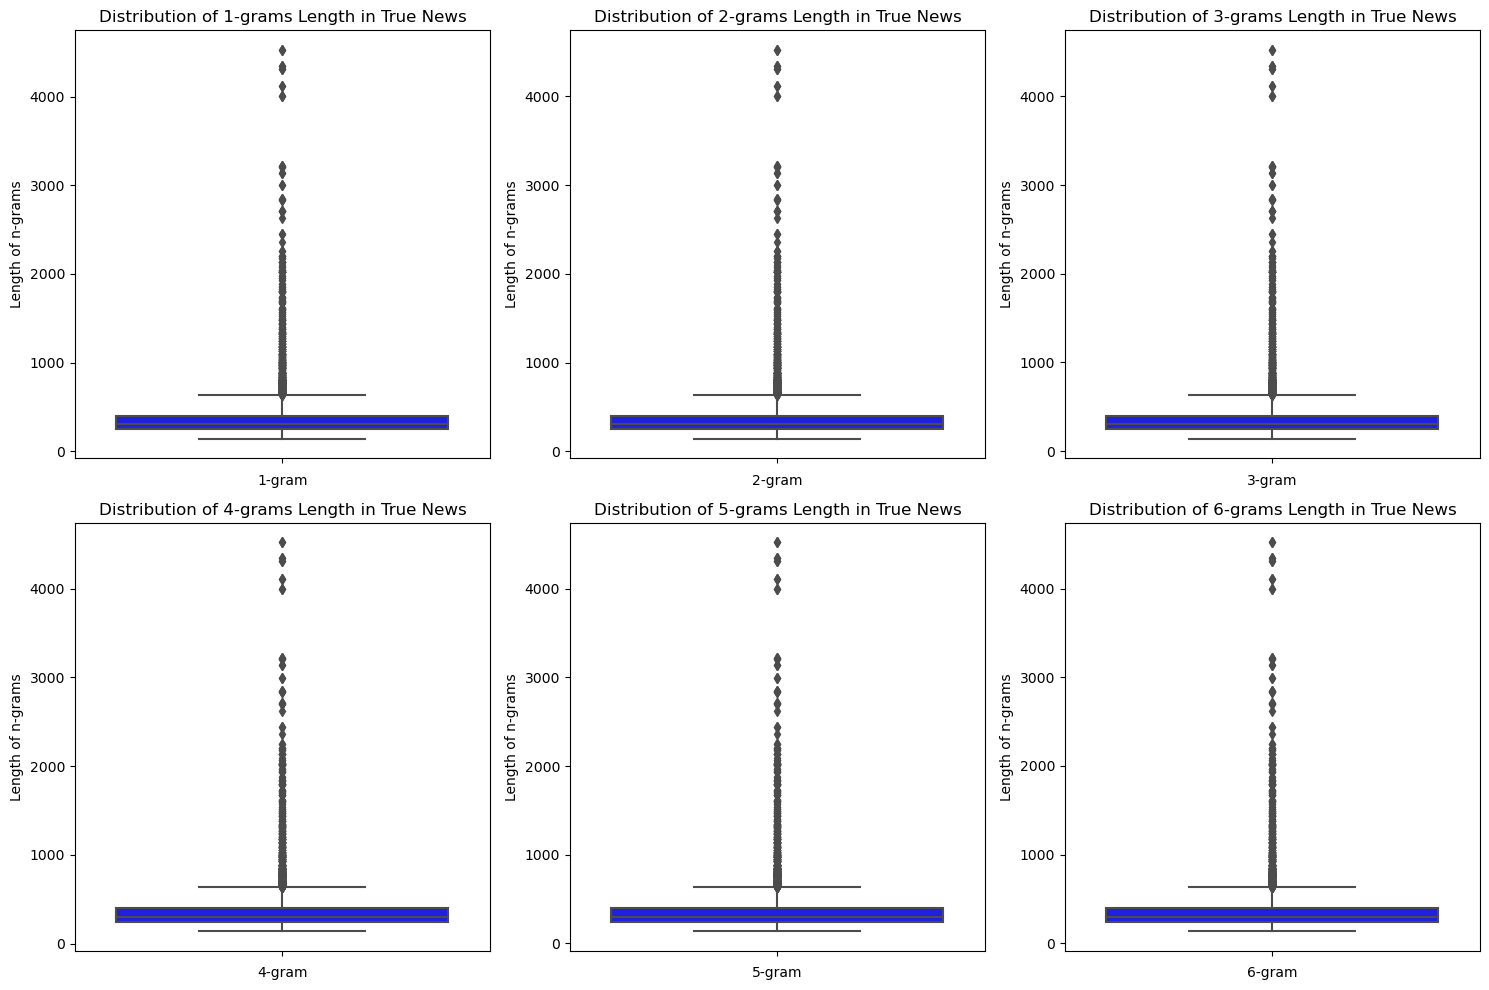

In [26]:

# Plot boxplots for each n-gram range for fake news
plt.figure(figsize=(15, 10))
for n in range(1, 7):
    plt.subplot(2, 3, n)
    sns.boxplot(y=dfNgram[dfNgram['label'] == 0][f'{n}_grams'].apply(lambda x: len(x)), color='red')
    plt.xlabel(f'{n}-gram')
    plt.ylabel('Length of n-grams')
    plt.title(f'Distribution of {n}-grams Length in Fake News')

plt.tight_layout()
plt.show()

# Plot boxplots for each n-gram range for true news
plt.figure(figsize=(15, 10))
for n in range(1, 7):
    plt.subplot(2, 3, n)
    sns.boxplot(y=dfNgram[dfNgram['label'] == 1][f'{n}_grams'].apply(lambda x: len(x)), color='blue')
    plt.xlabel(f'{n}-gram')
    plt.ylabel('Length of n-grams')
    plt.title(f'Distribution of {n}-grams Length in True News')

plt.tight_layout()
plt.show()


Comparing N-grams

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np


# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Compare the performance of logistic regression models for each n-gram range using cross-validation
results = {}
for n in range(1, 7):
    X = dfNgram[f'{n}_grams']
    y = dfNgram['label']
    X_transformed = CountVectorizer().fit_transform(X)
    scores = cross_val_score(lr_model, X_transformed, y, cv=5)
    results[n] = np.mean(scores)

# Print the results
for n, score in results.items():
    print(f'{n}-gram: {score}')

# Find the best n-gram
best_ngram = max(results, key=results.get)
print(f'Best n-gram: {best_ngram}')



KeyboardInterrupt



In [27]:
dfNgram

,label,cleaned_text,cleaned_subject,cleaned_title,token_count,1_grams,2_grams,3_grams,4_grams,5_grams,6_grams
0,1,thought republican bigger prick toward rep joh...,news,gop governor demand thank rep john lewis repub...,82,"[thought, republican, bigger, prick, rep, john...","[thought republican, republican bigger, bigger...","[thought republican bigger, republican bigger ...","[thought republican bigger prick, republican b...","[thought republican bigger prick rep, republic...","[thought republican bigger prick rep john, rep..."
1,0,johannesburg reuters south africa anc delegate...,worldnews,south africa anc vote elect leader replace sca...,113,"[johannesburg, reuters, south, africa, anc, de...","[johannesburg reuters, reuters south, south af...","[johannesburg reuters south, reuters south afr...","[johannesburg reuters south africa, reuters so...","[johannesburg reuters south africa anc, reuter...",[johannesburg reuters south africa anc delegat...
2,1,beau biden son vice president joe biden died b...,politics,joe bidens son beau dy age 46,141,"[beau, biden, son, vice, president, joe, biden...","[beau biden, biden son, son vice, vice preside...","[beau biden son, biden son vice, son vice pres...","[beau biden son vice, biden son vice president...","[beau biden son vice president, biden son vice...","[beau biden son vice president joe, biden son ..."
3,1,criminal brazen crooked group people ever act ...,leftnews,breaking aclj file lawsuit obamas corrupt atto...,83,"[criminal, brazen, crooked, group, people, act...","[criminal brazen, brazen crooked, crooked grou...","[criminal brazen crooked, brazen crooked group...","[criminal brazen crooked group, brazen crooked...","[criminal brazen crooked group people, brazen ...","[criminal brazen crooked group people act, bra..."
4,1,thursday donald trump devastated appeal court ...,news,hillary clinton dropped mic trump muslim ban g...,82,"[thursday, donald, trump, devastated, appeal, ...","[thursday donald, donald trump, trump devastat...","[thursday donald trump, donald trump devastate...","[thursday donald trump devastated, donald trum...","[thursday donald trump devastated appeal, dona...",[thursday donald trump devastated appeal court...
...,...,...,...,...,...,...,...,...,...,...,...
13829,0,vienna reuters austrian conservative leader se...,worldnews,austrian conservative kurz say need time coali...,100,"[vienna, reuters, austrian, conservative, lead...","[vienna reuters, reuters austrian, austrian co...","[vienna reuters austrian, reuters austrian con...","[vienna reuters austrian conservative, reuters...","[vienna reuters austrian conservative leader, ...",[vienna reuters austrian conservative leader s...
13830,1,husband continues bully people twitter melania...,news,america laugh melania trump hypocritically whi...,70,"[husband, continues, bully, people, twitter, m...","[husband continues, continues bully, bully peo...","[husband continues bully, continues bully peop...","[husband continues bully people, continues bul...","[husband continues bully people twitter, conti...",[husband continues bully people twitter melani...
13831,0,philadelphia reuters u constitution protects s...,politicsnews,court hears appeal ruling menendez corruption ...,75,"[philadelphia, reuters, constitution, protects...","[philadelphia reuters, reuters constitution, c...","[philadelphia reuters constitution, reuters co...","[philadelphia reuters constitution protects, r...",[philadelphia reuters constitution protects se...,[philadelphia reuters constitution protects se...
13832,0,seoul reuters soon north korea tested sixth la...,worldnews,south korea daily stress outweigh north korea ...,117,"[seoul, reuters, soon, north, korea, tested, s...","[seoul reuters, reuters soon, soon north, nort...","[seoul reuters soon, reuters soon north, soon ...","[seoul reuters soon north, reuters soon north ...","[seoul reuters soon north korea, reuters soon ...","[seoul reuters soon north korea tested, reuter..."


In [44]:
columns_to_drop = ['cleaned_text', 'cleaned_subject', 'token_count', 'cleaned_title', '2_grams','3_grams', '4_grams', '5_grams','6_grams']
dfNgram.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
columns_to_drop = ['3_grams']
dfNgram.drop(columns_to_drop, axis=1, inplace=True)


In [47]:
dfNgram
# Save to CSV
dfNgram.to_csv('ngram.csv', index=False)

In [45]:
dfNgram

,label,1_grams
0,1,"[thought, republican, bigger, prick, rep, john..."
1,0,"[johannesburg, reuters, south, africa, anc, de..."
2,1,"[beau, biden, son, vice, president, joe, biden..."
3,1,"[criminal, brazen, crooked, group, people, act..."
4,1,"[thursday, donald, trump, devastated, appeal, ..."
...,...,...
13829,0,"[vienna, reuters, austrian, conservative, lead..."
13830,1,"[husband, continues, bully, people, twitter, m..."
13831,0,"[philadelphia, reuters, constitution, protects..."
13832,0,"[seoul, reuters, soon, north, korea, tested, s..."


Bag of Words

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is in a CSV file named 'news_dataset.csv'
dfBow = pd.read_csv('balanced_subset.csv')

# Initialize CountVectorizer to convert text to bag of words
vectorizer = CountVectorizer()

# Fit and transform the text data to create the bag of words representation
X = vectorizer.fit_transform(dfBow['cleaned_text'])

# Convert the bag of words representation to a DataFrame for easier manipulation
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

dfBow

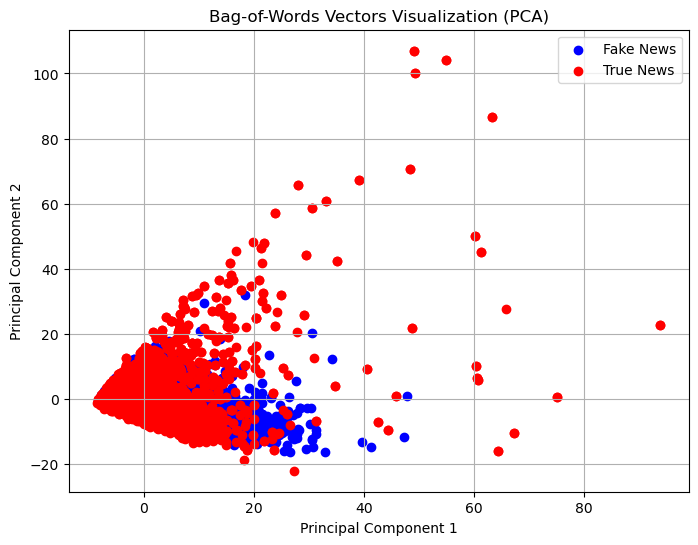

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Create a DataFrame for visualization
visualization_df = pd.DataFrame({
    'PC1': X_reduced[:, 0],
    'PC2': X_reduced[:, 1],
    'label': dfBow['label']  # Assuming you have a 'label' column indicating 0 or 1
})

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(visualization_df[visualization_df['label'] == 0]['PC1'], visualization_df[visualization_df['label'] == 0]['PC2'], color='blue', label='Fake News')
plt.scatter(visualization_df[visualization_df['label'] == 1]['PC1'], visualization_df[visualization_df['label'] == 1]['PC2'], color='red', label='True News')
plt.title('Bag-of-Words Vectors Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


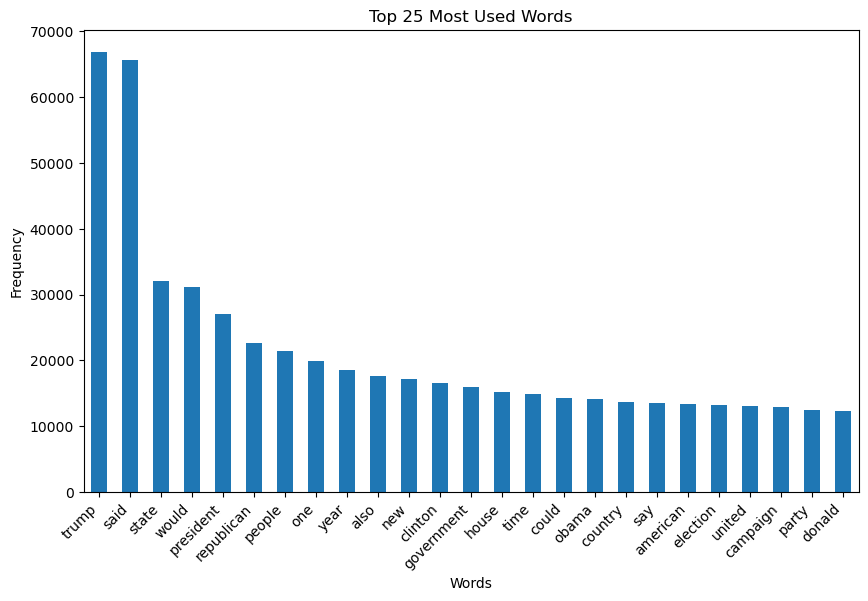

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Get the sum of counts for each word
word_counts = bow_df.sum()

# Sort the words by their counts in descending order
word_counts_sorted = word_counts.sort_values(ascending=False)

# Select the top 25 most used words
top_25_words = word_counts_sorted.head(25)

# Plot the top 25 most used words
plt.figure(figsize=(10, 6))
top_25_words.plot(kind='bar')
plt.title('Top 25 Most Used Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
bow_df

,00,000,0000,000000017,000004,00009,0001,0006,0009,000dillon000,...,zynga,zypries,zyries,zyuganov,zyuseragentifzxzbreak,zz,zztaine,zzzzaaaacccchhh,zzzzzzzzzzzzz,émigré
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Below we perform a sentiment analysis

In [2]:
sentiment_df = pd.read_csv('balanced_subset.csv')


In [3]:
from textblob import TextBlob

# Function to apply sentiment analysis
def analyze_sentiment(text):
    testimonial = TextBlob(text)
    return testimonial.sentiment.polarity, testimonial.sentiment.subjectivity

# Applying sentiment analysis to the 'cleaned_text' and 'cleaned_title' columns
sentiment_df['text_polarity'], sentiment_df['text_subjectivity'] = zip(*sentiment_df['cleaned_text'].apply(analyze_sentiment))
sentiment_df['title_polarity'], sentiment_df['title_subjectivity'] = zip(*sentiment_df['cleaned_title'].apply(analyze_sentiment))

print(sentiment_df.head())



   label                                       cleaned_text cleaned_subject  \
0      1  thought republican bigger prick toward rep joh...            news   
1      0  johannesburg reuters south africa anc delegate...       worldnews   
2      1  beau biden son vice president joe biden died b...        politics   
3      1  criminal brazen crooked group people ever act ...        leftnews   
4      1  thursday donald trump devastated appeal court ...            news   

                                       cleaned_title  token_count  \
0  gop governor demand thank rep john lewis repub...           82   
1  south africa anc vote elect leader replace sca...          113   
2                      joe bidens son beau dy age 46          141   
3  breaking aclj file lawsuit obamas corrupt atto...           83   
4  hillary clinton dropped mic trump muslim ban g...           82   

   text_polarity  text_subjectivity  title_polarity  title_subjectivity  
0       0.121887           0.419725 

To better interpret the both subjectivity and polarity of the titles and the text in the articles, we have created a scatter plot diagram below containing all data combined:

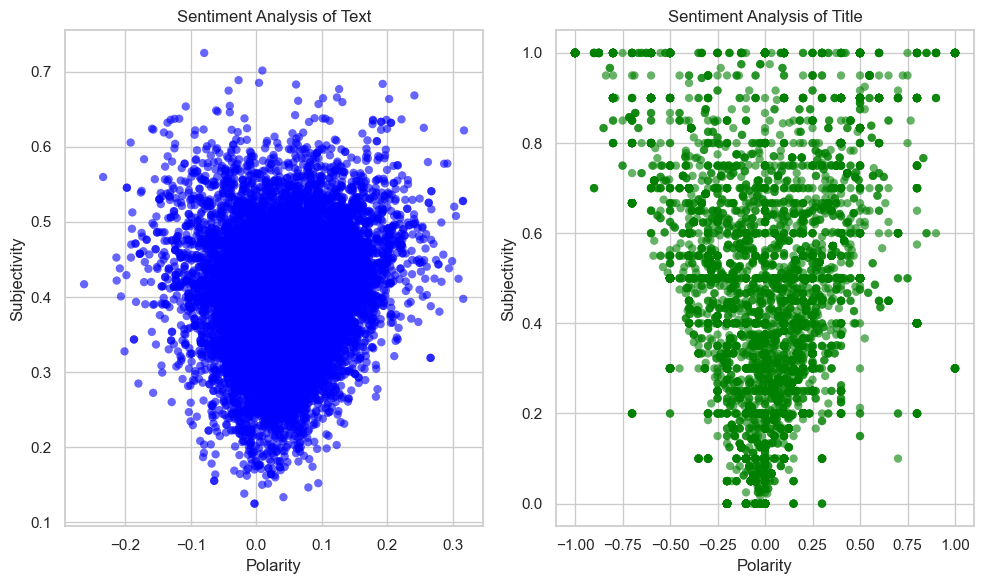

In [4]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot for text sentiment
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='text_polarity', y='text_subjectivity', data=sentiment_df, alpha=0.6, edgecolor='none', color='blue')
plt.title('Sentiment Analysis of Text')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Create a scatter plot for title sentiment
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='title_polarity', y='title_subjectivity', data=sentiment_df, alpha=0.6, edgecolor='none', color='green')
plt.title('Sentiment Analysis of Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


To further our understanding of the sentiment in the articles, we have further elaborated on the scatter plot, to enabling a 
distinction between fake and real news.

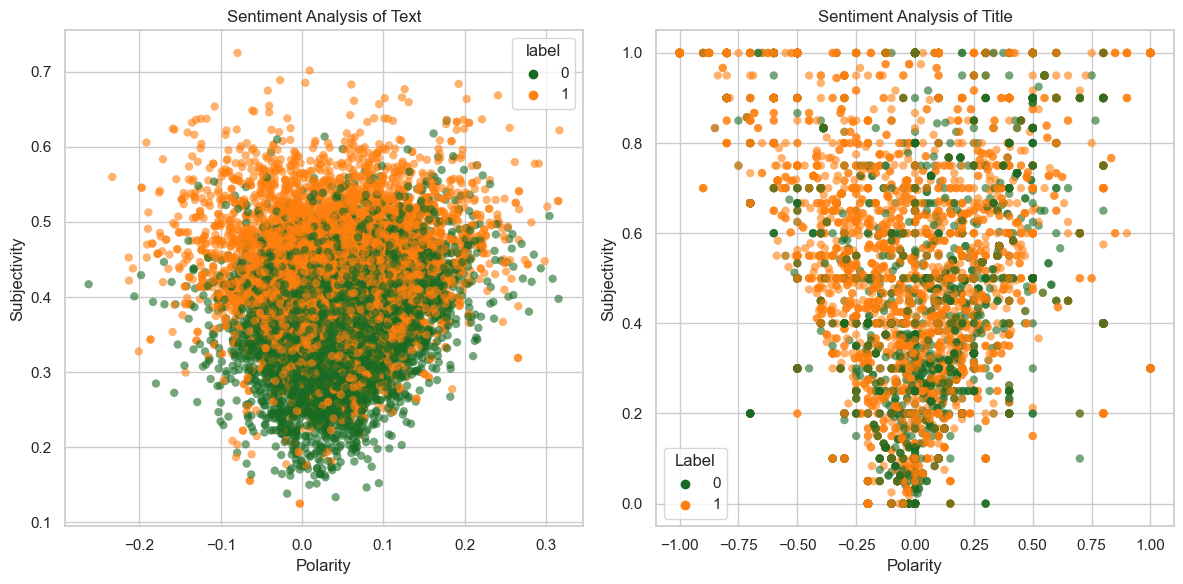

In [5]:
# Prepare the figure to host two plots
plt.figure(figsize=(12, 6))

custom_palette = ['#196B24', '#FF7F0E']  # Purple and blue

# Scatter plot for sentiment analysis of text
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='text_polarity', y='text_subjectivity', hue='label', data=sentiment_df, palette=custom_palette, alpha=0.6, edgecolor='none')
plt.title('Sentiment Analysis of Text')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Scatter plot for sentiment analysis of title
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='title_polarity', y='title_subjectivity', hue='label', data=sentiment_df, palette=custom_palette, alpha=0.6, edgecolor='none')
plt.title('Sentiment Analysis of Title')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Add a legend and show the plot
plt.legend(title='Label')
plt.tight_layout()
plt.show()


To further examine the results from above, we now  vizualize the distribution of subjectivity scores between fake and real news by creating a density plot

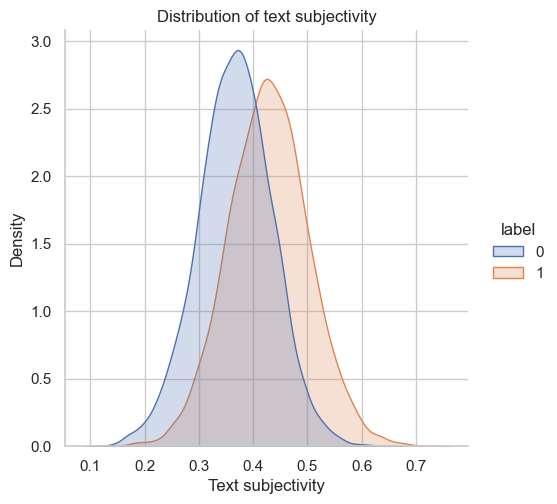

In [6]:
# label' is 0 for real news and 1 for fake news
sns.displot(sentiment_df, x="text_subjectivity", hue="label", kind="kde", fill=True)
plt.title('Distribution of text subjectivity')
plt.xlabel('Text subjectivity')
plt.ylabel('Density')
plt.show()


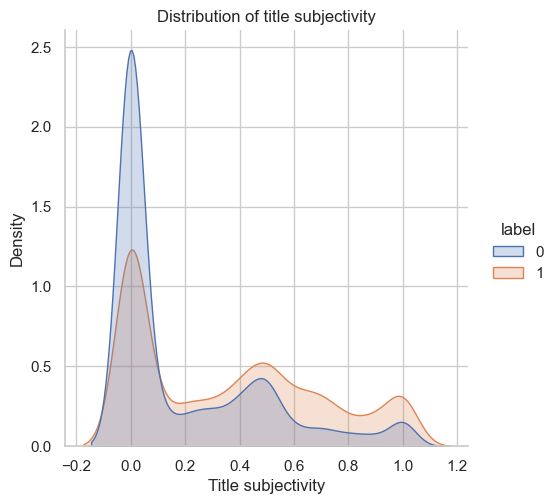

In [7]:
# label' is 0 for real news and 1 for fake news
sns.displot(sentiment_df, x="title_subjectivity", hue="label", kind="kde", fill=True)
plt.title('Distribution of title subjectivity')
plt.xlabel('Title subjectivity')
plt.ylabel('Density')
plt.show()

Below we create a correlation matrix and then correlation heatmaps to analyze whether hidden dependencies exits and to further deepen our analysis

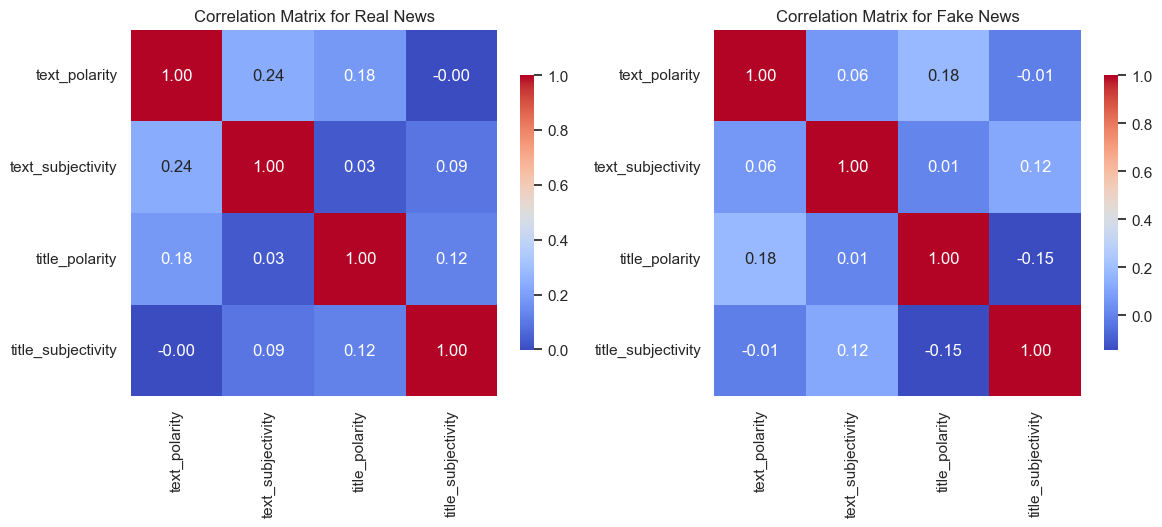

In [8]:
# Split the dataset into real and fake news
real_news = sentiment_df[sentiment_df['label'] == 0]  # 0 for real news
fake_news = sentiment_df[sentiment_df['label'] == 1]  # 1 for fake news

# Calculate correlation matrices
corr_matrix_real = real_news[['text_polarity', 'text_subjectivity', 'title_polarity', 'title_subjectivity']].corr()
corr_matrix_fake = fake_news[['text_polarity', 'text_subjectivity', 'title_polarity', 'title_subjectivity']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Draw the heatmap for real news
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(corr_matrix_real, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Real News')

# Draw the heatmap for fake news
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(corr_matrix_fake, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix for Fake News')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Lastly, it is relevant to look into other factors that might affect the sentiment.
As we work with news articles and thus a large corpus of text, we look at the relationship between the text length and the sentiment, to ensure that we examine all relevant aspects of the dataset.

In [9]:
#Start by calculating the length for each row in the sentiment dataframe
# Calculate text length (word count)
sentiment_df['text_length'] = sentiment_df['cleaned_text'].apply(lambda x: len(x.split()))

# First few rows to verify
print(sentiment_df[['cleaned_text', 'text_length']].head())


                                        cleaned_text  text_length
0  thought republican bigger prick toward rep joh...          342
1  johannesburg reuters south africa anc delegate...          483
2  beau biden son vice president joe biden died b...          743
3  criminal brazen crooked group people ever act ...          344
4  thursday donald trump devastated appeal court ...          313


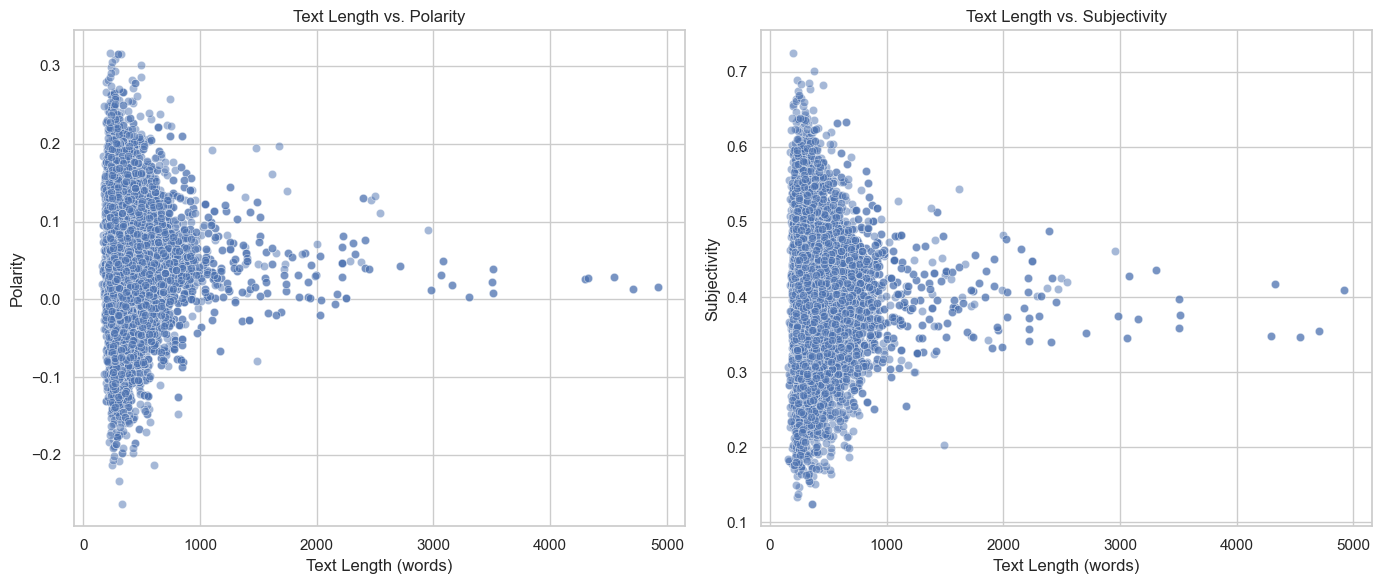

In [10]:
#Then we visualize the relationship between text length and sentiment
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Scatter plot for Text Length vs. Polarity
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='text_length', y='text_polarity', data=sentiment_df, alpha=0.5)
plt.title('Text Length vs. Polarity')
plt.xlabel('Text Length (words)')
plt.ylabel('Polarity')

# Scatter plot for Text Length vs. Subjectivity
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='text_length', y='text_subjectivity', data=sentiment_df, alpha=0.5)
plt.title('Text Length vs. Subjectivity')
plt.xlabel('Text Length (words)')
plt.ylabel('Subjectivity')

# Show the plots
plt.tight_layout()
plt.show()


Due to the large amount of data, we also look at the relationship with a more statisitcal approach, to get a more detailed understanding of what is illustrated above in the scatter plot

In [11]:
# Calculate and print correlation coefficients
correlation_polarity = sentiment_df['text_length'].corr(sentiment_df['text_polarity'])
correlation_subjectivity = sentiment_df['text_length'].corr(sentiment_df['text_subjectivity'])

print("Correlation between Text Length and Polarity:", correlation_polarity)
print("Correlation between Text Length and Subjectivity:", correlation_subjectivity)


Correlation between Text Length and Polarity: -0.014125724456984826
Correlation between Text Length and Subjectivity: -0.026926787940032854


The results above show a very weak correlation, thus the text length does not have a large impact on the polarity or the subjectivity of the text.

TF-IDF
We want to examine whether some words are more important than others, in determining whether it is fake or real news, which will be done by using TF-IDF.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

importance_df = pd.read_csv('balanced_subset.csv')

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the 'cleaned_text' column and create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(importance_df['cleaned_text'])



In [26]:
# Convert the TF-IDF matrix to a DataFrame for easier manipulation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [27]:
# Display the first few rows of the DataFrame
print(tfidf_df.head())


    00  000  0000  000000017  000004  00009  0001  0006  0009  000dillon000  \
0  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0   0.0           0.0   
1  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0   0.0           0.0   
2  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0   0.0           0.0   
3  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0   0.0           0.0   
4  0.0  0.0   0.0        0.0     0.0    0.0   0.0   0.0   0.0           0.0   

   ...  zynga  zypries  zyries  zyuganov  zyuseragentifzxzbreak   zz  zztaine  \
0  ...    0.0      0.0     0.0       0.0                    0.0  0.0      0.0   
1  ...    0.0      0.0     0.0       0.0                    0.0  0.0      0.0   
2  ...    0.0      0.0     0.0       0.0                    0.0  0.0      0.0   
3  ...    0.0      0.0     0.0       0.0                    0.0  0.0      0.0   
4  ...    0.0      0.0     0.0       0.0                    0.0  0.0      0.0   

   zzzzaaaacccchhh  zzzzzzzzzzzzz  émi

In [28]:
# Identify the most important words based on their TF-IDF scores
top_words = tfidf_df.max().sort_values(ascending=False)

# Display the top N most important words
N = 10  # You can change this value to display more or fewer words
print("Top", N, "Most Important Words:")
print(top_words.head(N))


Top 10 Most Important Words:
phoenixnewtimes    0.912477
scotusblog         0.905524
mica               0.882401
petrov             0.882387
popick             0.876376
pavarotti          0.868772
schlafly           0.847632
moreno             0.846323
taiwan             0.834171
wray               0.827630
dtype: float64


The above is the overall important words.
Below we look at the most important words of the fake news and the most important words in real news

In [30]:
# Filter DataFrame for real news (label 0)
real_news_df = importance_df[importance_df['label'] == 0]

# Filter DataFrame for fake news (label 1)
fake_news_df = importance_df[importance_df['label'] == 1]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the 'cleaned_text' column of real news
tfidf_matrix_real = tfidf_vectorizer.fit_transform(real_news_df['cleaned_text'])

# Convert TF-IDF matrix to DataFrame for real news
tfidf_df_real = pd.DataFrame(tfidf_matrix_real.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Apply TF-IDF to the 'cleaned_text' column of fake news
tfidf_matrix_fake = tfidf_vectorizer.fit_transform(fake_news_df['cleaned_text'])

# Convert TF-IDF matrix to DataFrame for fake news
tfidf_df_fake = pd.DataFrame(tfidf_matrix_fake.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Identify the most important words based on their TF-IDF scores for real news
top_words_real = tfidf_df_real.max().sort_values(ascending=False)

# Identify the most important words based on their TF-IDF scores for fake news
top_words_fake = tfidf_df_fake.max().sort_values(ascending=False)

# Display the top N most important words for real news
N = 10  # You can change this value to display more or fewer words
print("Top", N, "Most Important Words for Real News:")
print(top_words_real.head(N))

# Display the top N most important words for fake news
print("\nTop", N, "Most Important Words for Fake News:")
print(top_words_fake.head(N))


Top 10 Most Important Words for Real News:
mica        0.869031
moreno      0.854441
taiwan      0.825489
wray        0.821467
thiel       0.804433
pakistan    0.803658
lotte       0.803434
elector     0.797929
dowd        0.796125
moore       0.791628
dtype: float64

Top 10 Most Important Words for Fake News:
phoenixnewtimes    0.905110
scotusblog         0.895832
petrov             0.870686
popick             0.869683
pavarotti          0.860920
schlafly           0.843167
schiller           0.816615
dao                0.808910
silverman          0.803492
sabo               0.802741
dtype: float64
